# Finite difference simulations of 2D waves

## The mathematical model


Our 2D PDE is given by

$$
\frac{\partial^2 u}{\partial t^2} + b\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}\left(q(x,y) \frac{\partial u}{\partial x}\right) + \frac{\partial}{\partial y}\left(q(x,y) \frac{\partial u}{\partial y}\right) + f(x,y,t)
$$

with Neumann boundary conditions 

$$
\frac{\partial u}{\partial n} = 0,
$$

and initial conditions

$$
u(x,y,0) = I(x,y)
$$

$$
u_t(x,y,0) = V(x,y)
$$

## Discretization

We discretize the domain such that we have $N_x+1$ points in the $x$-direction, $N_y+1$ points in the $y$-direction and $N_t$ points in the time domain. Hence we have the spatial mesh

$$
0 < x_1 < \cdots <x_{N_t} < L_x,
$$

$$
0 < y_1 < \cdots < y_{N_t} < L_y,
$$

for some length $L$ and

$$ 
0 = t_0 < t_1 < \cdots < t_{N_t} = T
$$

for some total time $T$. 

### Ghost cells

We anticipate that we'll use ghost cells, such that we let 

$i = 0, 1, ..., N_x, N_x + 1$, in the $x$-direction where $i = 0$ and $i = N_x + 1$ correspond to ghost cells.
Similarly, we set 
$j = 0, 1, ..., N_y, N_y + 1$ in the $y$-direction where $j = 0$ and $j = N_y + 1$ correspond to ghost cells.

This means we'll operate with $i = 1$ and $i=N_x$ for the boundaries in the $x$-direction and $j = 1$ and $j = N_y$ as the boundaries in the $y$-direction

### Discretization in the time domain

We discretize in the time domain in the following way:
$$
(u_{tt})_{i,j}^n\approx \frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{\Delta t^2},
$$

$$
(u_{t})_{i,j}^n \approx \frac{u_{i,j}^{n+1} - u_{i,j}^n}{2\Delta t}
$$

### Discretizing the spatial terms

We can discretize the spatial terms in the following. Let's first define $\phi \equiv q(x,y)u_x$

$$
\partial_x \left(q(x,y) u_x \right) = \phi_x.
$$

We discretize this with centered difference at $x$ using a stepsize $h = \Delta x/2$. We then obtain the centered difference scheme

$$
(\phi_x)_{i,j}^n \approx \frac{\phi_{i+1/2,j}^n - \phi_{i-1/2,j}^n}{\Delta x},
$$

where we approximate the two terms using another round of centered difference at $x_{i \pm 1/2}$ as 

$$
\phi_{i+1/2,j}^n = q_{i+1,j}(u_x)_{i+1/2, j}^n \approx \frac{q_{i+1,j} + q_{i,j}}{2\Delta x}\left(u_{i+1,j}^n - u_{i,j}^n \right),
$$
where we approximated $q_{i+1/2,j} \approx (q_{i+1,j}+q_{i,j})/2$. A similar argument leads to

$$
\phi_{i-1/2,j}^n = q_{i-1/2,j}(u_x)_{i-1/2, j}^n \approx \frac{q_{i,j} + q_{i-1,j}}{2\Delta x}\left(u_{i,j}^n - u_{i-1,j}^n \right)
$$

This ultimately lead to the discretization formula 

$$
\left[ \partial_x \left(q u_x \right)\right]_{i,j}^n = \frac{(q_{i+1,j} + q_{i,j})(u_{i+1,j}^n - u_{i,j}^n)-(q_{i,j} + q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)}{2\Delta x^2}
$$

Discretization in the $y$ direction leads to an analogue expression:

$$
\left[ \partial_y \left(q u_y \right)\right]_{i,j}^n = \frac{(q_{i,j+1} + q_{i,j})(u_{i,j+1}^n - u_{i,j}^n)-(q_{i} + q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)}{2\Delta y^2}
$$

As a final note to fix our notation, we define $f(x_i, y_j, t_n) \equiv f_{i,j}^n$.

### Formula for the next timestep on the inner mesh points $u_{i,j}^{n+1}$

Combining all the terms gives

$$
\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{\Delta t^2} + b\frac{u_{i,j}^{n+1} - u_{i,j}^{n-1}}{2\Delta t} = \frac{(q_{i+1,j} + q_{i,j})(u_{i+1,j}^n - u_{i,j}^n)-(q_{i,j} + q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)}{2\Delta x^2} + \frac{(q_{i,j+1} + q_{i,j})(u_{i,j+1}^n - u_{i,j}^n)-(q_{i} + q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)}{2\Delta y^2} + f_{i,j}^n
$$

Which can be rearranged into

$$
u_{i,j}^{n+1} = A\bigg[ (b\Delta t - 2)u_{i,j}^{n-1} + 4u_{i,j}^n + C_x^2\left[(q_{i+1,j} + q_{i,j})(u_{i+1,j}^n - u_{i,j}^n)-(q_{i,j} + q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)\right] + C_y^2\left[(q_{i,j+1} + q_{i,j})(u_{i,j+1}^n - u_{i,j}^n)-(q_{i,j} + q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)\right] + 2\Delta t^2f_{i,j}^n \bigg].
$$

with $A \equiv 1/(1+2b\Delta t)$, $C_x \equiv \Delta t/\Delta x$ and $C_y \equiv \Delta t/\Delta y$.

### Imposing boundary conditions

Imposing the Neumann boundary conditions $\partial u/\partial n = 0$ effectively means 

$$
u_x(0,y,t) = 0, \qquad u_x(L_x, y, t) = 0,
$$

and 

$$
u_y(x,0,t) = 0, \qquad u_y(x,L_y,t) = 0
$$

Using a centered difference scheme at $x = 0$ and $x = L_x$ gives 

$$
(u_x)_{1,j}^n \approx \frac{u_{2,j}^n - u_{0, j}^n}{2\Delta x} = 0, \qquad (u_x)_{N_x,j}^n \approx \frac{u_{N_x+1,j}^n - u_{N_x-1, j}^n}{2\Delta x} = 0,
$$

meaning 

$$
u_{0,j}^n = u_{2,j}^n
$$

$$
u_{N_x+1, j}^n = u_{N_x-1, j}^n
$$

The same argument holds for the boundaries $y=0$ and $y=L_y$ such that 

$$
u_{i, 0}^n = u_{i, 2}^n,
$$

$$
u_{i, N_y+1}^n = u_{i, N_y-1}^n
$$

At the boundaries, we'll run into trouble with the evaluation of $q(x,y)$ outside the mesh. To circumvent this, we we Taylor expand in space:

$$
q_{i+1,j} = q_{i,j} + \Delta x(q_x)_{i,j} + \mathcal{O}(\Delta x^2)
$$

and

$$
q_{i-1, j} = q_{i,j} - \Delta x (q_x)_{i,j} + \mathcal{O}(\Delta x^2)
$$

which when added together yields 

$$
q_{i+1,j} + q_{i-1, j} = 2q_{i,j} + \mathcal{O}(\Delta x^2),
$$

meaning we can approximate $q$ at the boundary $i = 1$ with

Thus we can approximate $2q_{i,j} \approx q_{i+1,j} + q_{i-1,j}$, and similarly in the $y$-direction.

With this approximation, we can summarize four equations relevant for their respective boundaries boundary:

$$
q_{0,j} \approx 2q_{1, j} - q_{2,j}, \qquad x = 0,
$$

$$
q_{N_x+1,j} \approx 2q_{N_x, j} - q_{N_x-1,j},  \qquad x = L_x,
$$

$$
q_{i,0} \approx 2q_{i, 1} - q_{i, 2}, \qquad y = 0,
$$

$$
q_{i, N_y+1} \approx 2q_{i, N_y} - q_{i, N_y-1}, \qquad y = L_y,
$$

where $i = 0$ and $i = N_x+1$ are ghost cells in the $x$-direction and $j = 0$ and $j=N_y+1$ are ghost cells in the $y$-direction.

### Formula for the first time step $u_{i,j}^1$

The initial conditions

$$
u(x,y,0) = I(x,y) \to u_{i,j}^0 = I_{i,j}
$$

and

$$
u_t(x,y,0) = V(x,y) \to (u_t)_{i,j}^0 = V_{i,j}
$$

Using centered difference in the time domain, we get 

$$
(u_t)_{i,j}^0 \approx \frac{u_{i,j}^{1}-u_{i,j}^{-1}}{2\Delta t} = V_{i,j},
$$

which gives us 

$$
u_{i,j}^{-1} = u_{i,j}^1 - 2\Delta t V_{i,j}
$$

Inserting $n = 0$ and rearranging gives us

$$
u_{i,j}^{1} =  \frac{1}{4}\bigg[ 2\Delta t(2-b\Delta t)V_{ij}  + 4u_{i,j}^0 + C_x^2\left[(q_{i+1,j} + q_{i,j})(u_{i+1,j}^0 - u_{i,j}^0)-(q_{i,j} + q_{i-1,j})(u_{i,j}^0 - u_{i-1,j}^0)\right] + C_y^2\left[(q_{i,j+1} + q_{i,j})(u_{i,j+1}^0 - u_{i,j}^0)-(q_{i,j} + q_{i,j-1})(u_{i,j}^0 - u_{i,j-1}^0)\right] + 2\Delta t^2f_{i,j}^0 \bigg].
$$

## Verification

### Constant solution

Assuming that $u(x,y,t) = U$ for some real constant $U$, we get that 

$$
u_x = 0, \qquad u_y = 0, 
$$
and 

$$
u_t = 0, \qquad u_{tt} = 0,
$$

The generic wave equation PDE may be compactly written as

$$
u_{tt} + bu_t = \partial_x (qu_x) + \partial_y (qu_y) + f.
$$

This equation imply that $f(x,y,t) = 0$ since all other terms are zero.

The initial conditions imply that 

$$ 
u(x,y,0) = U = I(x,y), \qquad u_t(x,y,0) = 0 = V(x,y).
$$

On "physical" grounds, we must require $b = 0$ since a non-zero damping coefficient will necessarily be inconsistent with a constant solution. We further set $q(x,y) = 1$.

#### Constant solution using scalar code

In [1]:
from scalar_wavesolver2D import scalar_wavesolver2D
import numpy as np

In [2]:
U = 1.
I = lambda x,y: U
V = lambda x,y: 0.
f = lambda x,y,t: 0.
q = lambda x, y: 1. 

In [3]:
b = 0.
Nx = 10
Ny = 10
T = 10
Lx = 1.
Ly = 1.

In [4]:
my_solver = scalar_wavesolver2D(b, Nx, Ny, Lx, Ly, T)

In [5]:
my_solver.set_function_conditions(I, V, f, q)
my_solver.set_conditions()
my_solver.solve()
my_solver.print_solution()

0.07071067811865475
Timeused =  0.1035304069519043
u =  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


#### Constant solution using vectorized code

In [6]:
from vector_wavesolver2D import vector_wavesolver2D

In [7]:
my_solver = vector_wavesolver2D(b, Nx, Ny, Lx, Ly, T)

In [8]:
my_solver.set_function_conditions(I, V, f, q)
my_solver.set_conditions()
my_solver.solve()
my_solver.print_solution()

u =  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Standing wave solution

Let $q(x,y) = q_0 \in \mathbb{R} \ \forall \ (x,y) \in [0,L_x] \times [0,L_y]$ and $f(x,y,t) = 0$. A solution set is then given by standing waves 

$$
u(x,y,t) = A\cos(k_x x) \cos(k_y y) \cos(\omega t), \qquad k_x = \frac{m_x\pi}{L_x}, \qquad k_y = \frac{m_y\pi}{L_y}
$$

with

$$
I(x,y) = u(x,y,0) = A\cos(k_x x) \cos(k_y y),
$$

and

$$
V(x,y) = u_t(x,y,0) = 0.
$$

To determine $\omega$, we can differentiate u in the simpler PDE $u_{tt} = c^2(u_{xx} + u_{yy})$. Clearly, $u_{tt} = -\omega^2u$, $u_{xx} = -k_x^2u$ and $u_{yy} = -k_y^2u$, and inserting into the PDE, we obtain

$$
\omega = c\sqrt{k_x^2 + k_y^2}
$$

#### Convergence rate

In the following we test the vectorized solver for convergence rate which is expected to be $r = 2$.

In [1]:
from vector_wavesolver2D import vector_wavesolver2D
from scalar_wavesolver2D import scalar_wavesolver2D
import numpy as np

def q(x,y):
    return 1.

def I(x,y,n=1, m=1, Lx = 1, Ly = 1):
    return np.cos(n*np.pi*x/Lx)*np.cos(m*np.pi*y/Ly)

def f(x,y,t):
    return 0

def V(x,y):
    return 0

def analytical(x,y,t, n=1, m=1, Lx = 1, Ly = 1):
    c = 1.
    omega = np.sqrt( (n*np.pi/Lx)**2 + (m*np.pi/Ly)**2 )*c
    return np.cos(n*np.pi*x/Lx)*np.cos(m*np.pi*y/Ly)*np.cos(omega*t)

In [2]:
Lx = 1
Ly = 1
Nx = 10
Ny = 10
T = 1

In [3]:
#Compute convergence rate:
r = []
E = []
h = []
N = [2**i for i in range(1, 9)]
for n in N:
    Nx = n
    Ny = n
    my_solver = vector_wavesolver2D(b=0., Nx = Nx, Ny=Ny, Lx = Lx, Ly = Ly, T = T)
    my_solver.set_function_conditions(I = I, V = V, f = f, q = q)
    my_solver.set_conditions()
    my_solver.solve()
    linf_norm, dx = my_solver.compute_error(analytical)
    E.append(linf_norm)
    h.append(dx)

for i in range(len(E)-1):
    r.append( np.log10(E[i+1]/E[i])/np.log10(h[i+1]/h[i]) )
print(r)

[1.8276717458936715, 2.046689208094095, 1.9766942506024996, 2.0395812659777923, 2.0073883646505872, 1.9967557665096383, 2.0053863254881414]


The test shows that the convergence rate is approximately $r = 2$.

### Damped waves with variable velocity

Let 
$$
u(x,y,t) = \left(A\cos\omega t + B\sin \omega t \right)e^{-dt}\cos(k_x x) \cos(k_y y), \qquad k_x = \frac{m_x\pi}{L_x}, \qquad k_y = \frac{m_y\pi}{L_y}.
$$

To simplify matters, we set $B = 0$ such that 

$$
u(x,y,t) = A\cos \omega t e^{-dt}\cos(k_x x) \cos(k_y y),
$$
and assuming that $q(x,y) = y$, we obtain

$$
f(x,y,t) = (k^2 y + k_y \tan (k_y y) - \omega^2 - d^2) u(x,y,t),
$$
where we've also assumed that $b = 2d$.

Clearly, the expressions for $I(x,y)$ and $V(x,y)$ are easily obtained to be 

$$
I(x,y) = A\cos(k_x x) \cos(k_y y),
$$

and

$$
V(x,y) = -Ad \cos (k_x x) \cos (k_y y).
$$

In [1]:
from vector_wavesolver2D import vector_wavesolver2D
import numpy as np

def q(x,y):
    return y

def I(x,y,nx=1, my=1, Lx = 1, Ly = 1):
    kx = nx*np.pi/Lx
    ky = my*np.pi/Ly
    return np.cos(kx*x)*np.cos(ky*y)

def f(x, y, t, nx=1, my=1, omega=1., d=1., Lx = 1, Ly = 1):
    kx = nx*np.pi/Lx
    ky = my*np.pi/Ly
    k_squared = kx**2 + ky**2
    u = np.cos(omega*t)*np.exp(-d*t)*np.cos(kx*x)*np.cos(ky*y)
    return (k_squared*y + ky*np.tan(ky*y)-2*omega**2)*u

def V(x, y, nx=1, my=1, Lx = 1, Ly = 1, d=1):
    kx = nx*np.pi/Lx
    ky = my*np.pi/Ly
    return -d*np.cos(kx*x)*np.cos(ky*y)

def analytical(x, y, t, nx=1, my=1, omega=1., d=1, Lx = 1, Ly = 1):
    kx = nx*np.pi/Lx
    ky = my*np.pi/Ly
    k_squared = kx**2 + ky**2
    return np.cos(omega*t)*np.exp(-d*t)*np.cos(kx*x)*np.cos(ky*y)

In [2]:
Lx = 1
Ly = 1
T = 1
#Compute convergence rate:
r = []
E = []
h = []
N = [2**i for i in range(1, 8)]
print(N)
for n in N:
    Nx = n
    Ny = n
    print("n = ", n)
    my_solver = vector_wavesolver2D(b=2., Nx = Nx, Ny=Ny, Lx = Lx, Ly = Ly, T = T)
    my_solver.set_function_conditions(I = I, V = V, f = f, q = q)
    my_solver.set_conditions()
    my_solver.solve()
    #my_solver.plot_solution(analytical)
    #linf_norm, dx = my_solver.compute_error(analytical)
    linf_norm, dx = my_solver.compute_error(analytical)
    #my_solver.plot_solution(analytical)
    E.append(linf_norm)
    h.append(dx)
    
for i in range(len(E)-1):
    r.append( np.log10(E[i+1]/E[i])/np.log10(h[i+1]/h[i]) )
print(r)

[2, 4, 8, 16, 32, 64, 128]
n =  2
n =  4
n =  8
n =  16
n =  32
n =  64
n =  128
[2.5337057950642277, 1.408729101409308, 1.967827379302148, 1.980274832254245, 1.986922921578017, 1.995906926550047]


So clearly, again, the convergence rate is approximately found to be $r = 2$.

### Investigating a physical problem

9.904544411531507


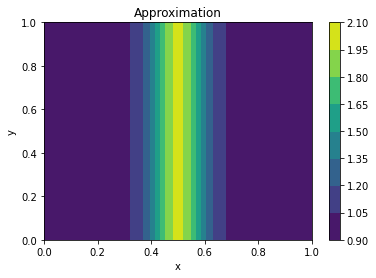

9.904544411531507


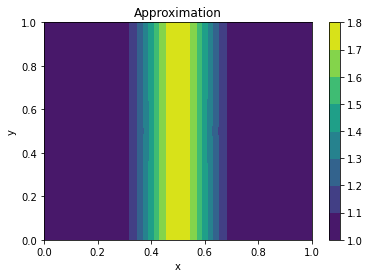

9.904544411531507


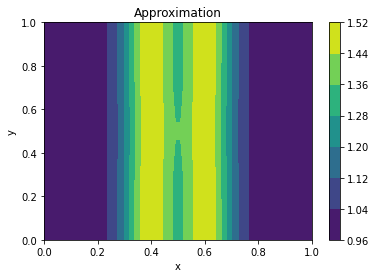

9.904544411531507


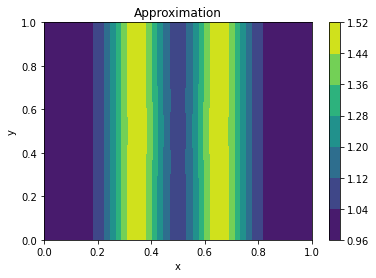

9.904544411531507


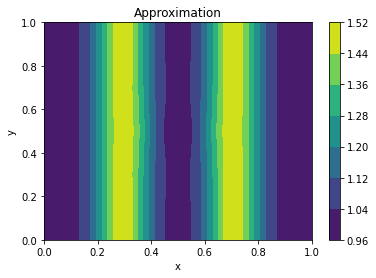

9.904544411531507


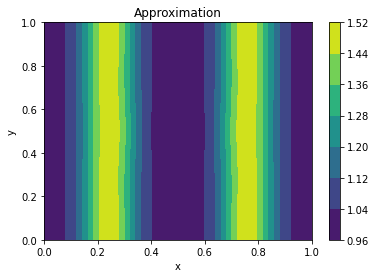

9.904544411531507


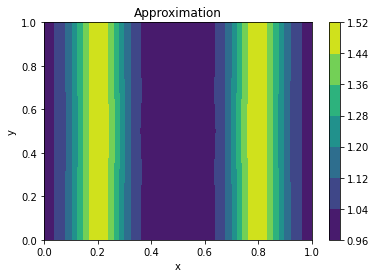

9.904544411531507


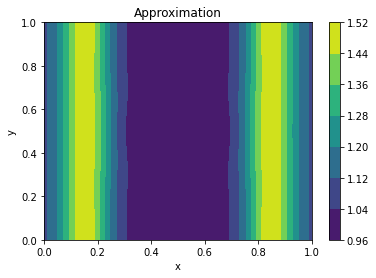

9.904544411531507


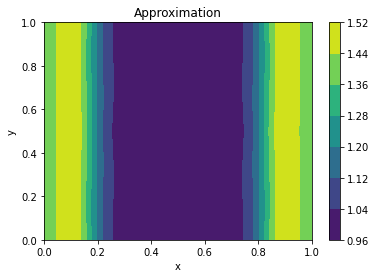

9.904544411531507


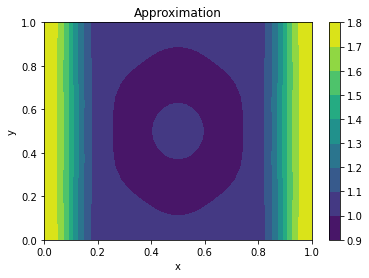

9.904544411531507


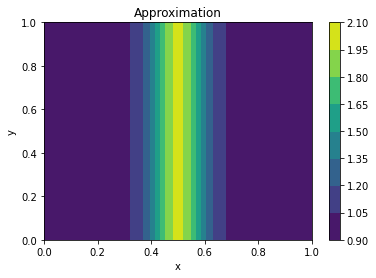

9.904544411531507


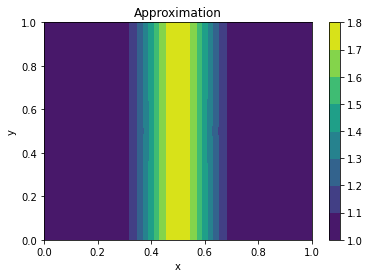

9.904544411531507


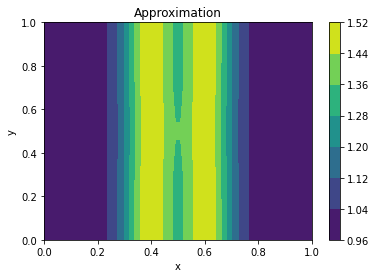

9.904544411531507


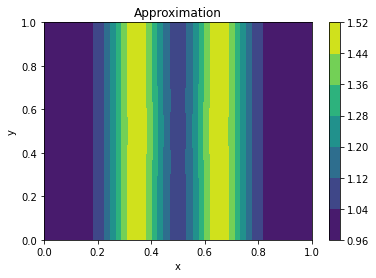

9.904544411531507


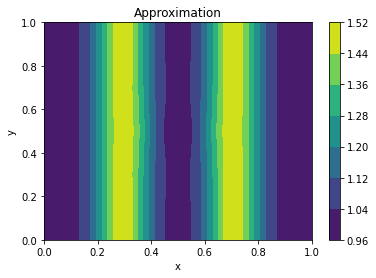

9.904544411531507


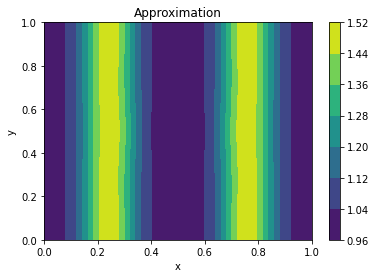

9.904544411531507


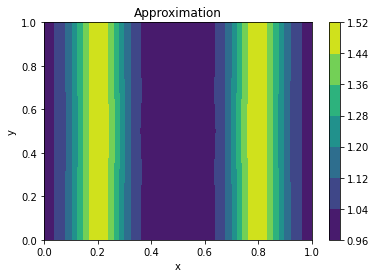

9.904544411531507


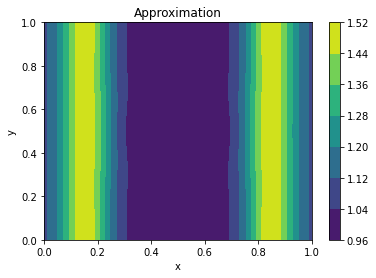

9.904544411531507


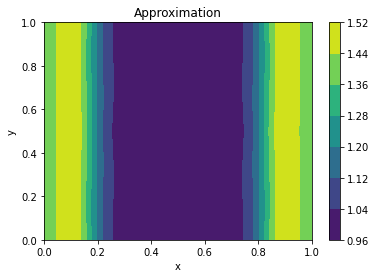

9.904544411531507


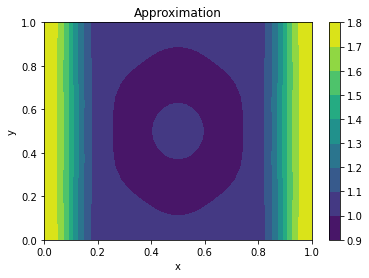

9.904544411531507


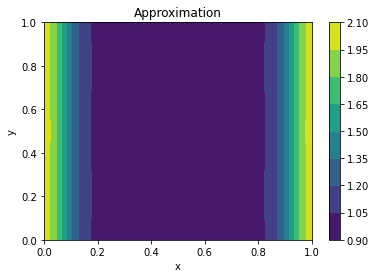

9.904544411531507


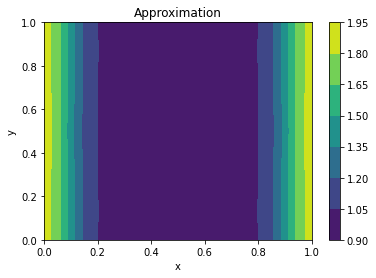

9.904544411531507


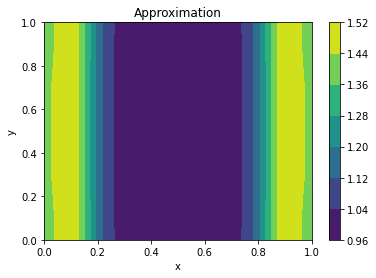

9.904544411531507


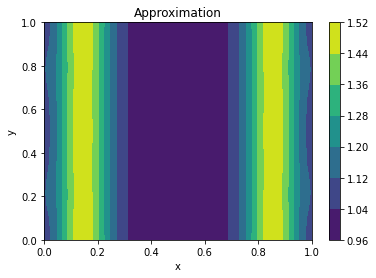

9.904544411531507


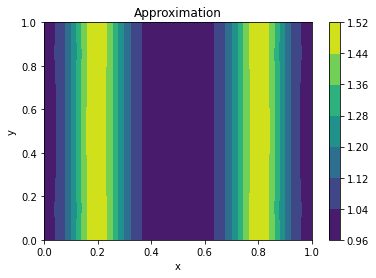

9.904544411531507


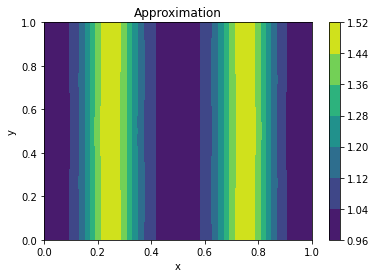

9.904544411531507


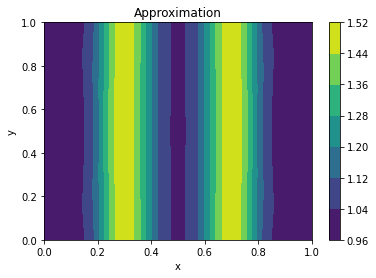

9.904544411531507


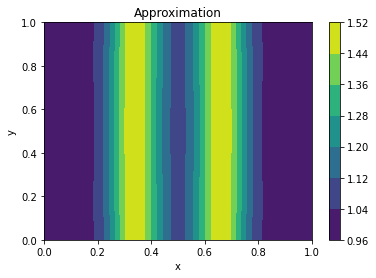

9.904544411531507


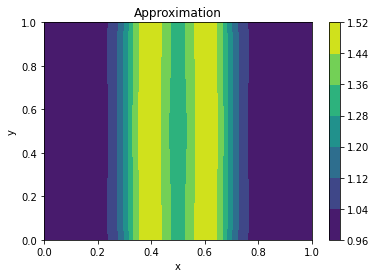

9.904544411531507


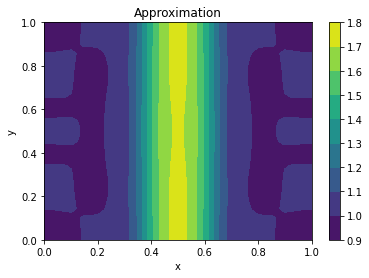

9.904544411531507


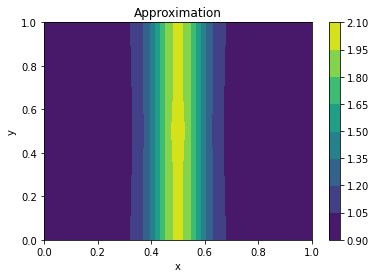

In [13]:
from vector_wavesolver2D import vector_wavesolver2D
from scalar_wavesolver2D import scalar_wavesolver2D
import numpy as np

def I(x,y, I0 = 1, Ia = 1., Im = 0.5, Is = 0.1):
    return I0 + Ia*np.exp(-((x-Im)/Is)**2)

def V(x,y):
    return 0.

def f(x,y,t):
    return 0.

def q(x,y, g=9.81, H0 = 10):
    return g*(H0 - B(x,y))

def B(x,y, B0=0., Ba = 1., Bmx = 0.5, Bmy = 0.5, Bs = 0.1):
    return B0 + Ba*np.exp(-( ((x-Bmx)/Bs)**2 + ((y-Bmy)/Bs)**2 ) )


Nx = 50
Ny = 50
Lx = 1.
Ly = 1.
b = 0.

times = [0.005*i for i in range(21)]
for T in times:
    my_solver = vector_wavesolver2D(b=b, Nx = Nx, Ny = Ny, Lx = Lx, Ly = Ly, T = T)
    my_solver.set_function_conditions(I = I, V = V, f = f, q = q)
    my_solver.set_conditions()
    my_solver.solve()
    my_solver.plot_solution(analytical=None)

9.904544411531507


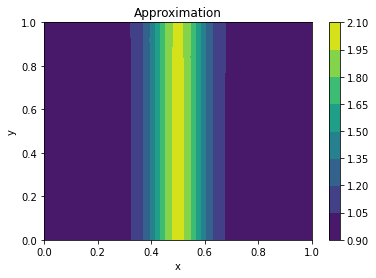

9.904544411531507


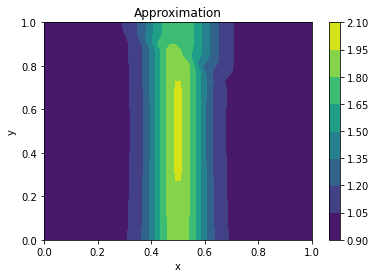

9.904544411531507


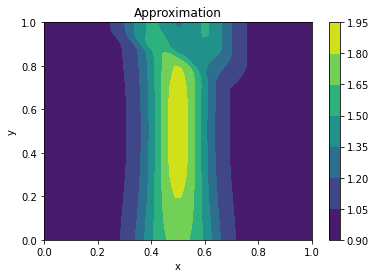

9.904544411531507


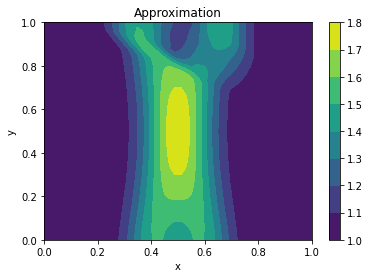

9.904544411531507


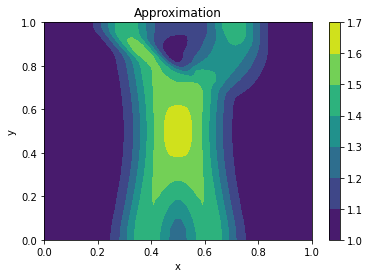

9.904544411531507


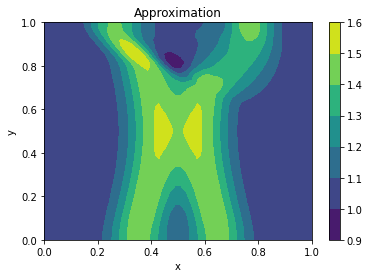

9.904544411531507


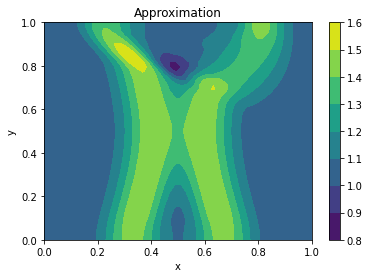

9.904544411531507


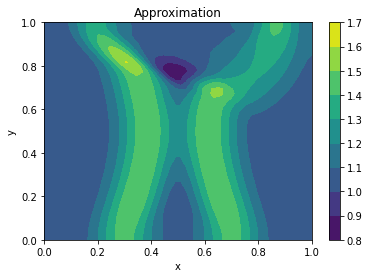

9.904544411531507


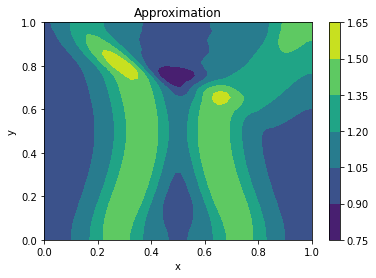

9.904544411531507


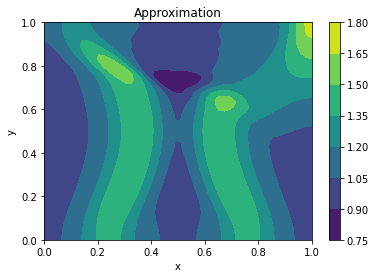

9.904544411531507


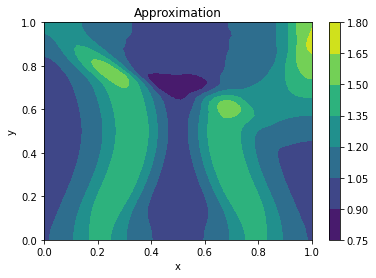

9.904544411531507


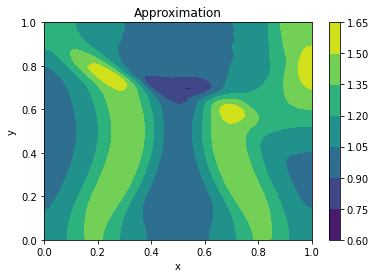

9.904544411531507


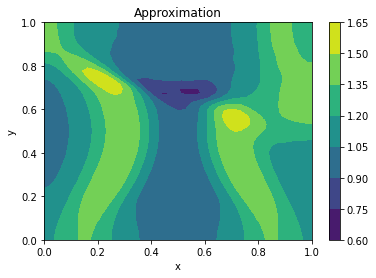

9.904544411531507


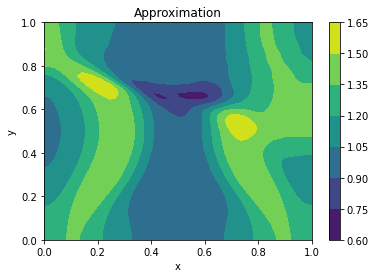

9.904544411531507


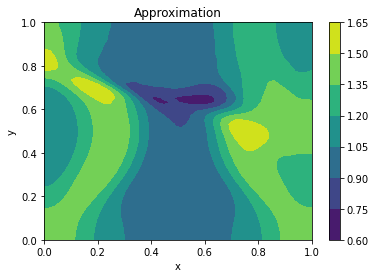

9.904544411531507


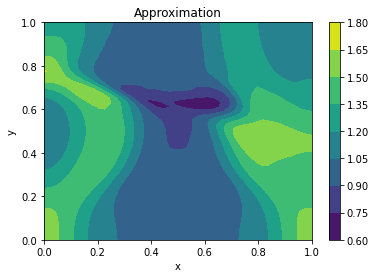

9.904544411531507


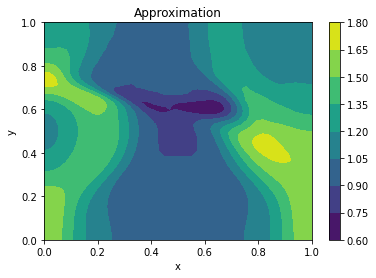

9.904544411531507


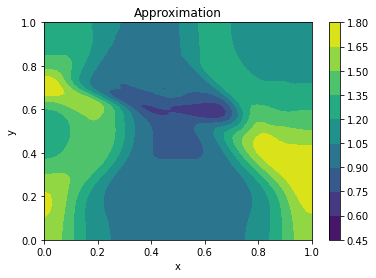

9.904544411531507


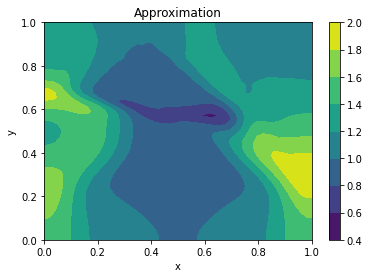

9.904544411531507


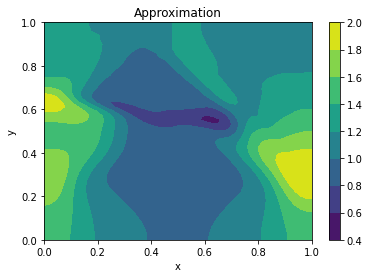

9.904544411531507


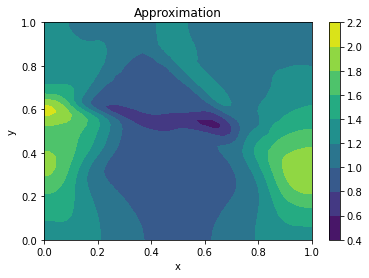

In [20]:
def I(x,y, I0 = 1, Ia = 1., Im = 0.5, Is = 0.1):
    return I0 + Ia*np.exp(-((x-Im)/Is)**2)

def V(x,y):
    return 0.

def f(x,y,t):
    return 0.

def q(x,y, g=9.81, H0 = 10):
    return g*(H0 - B(x,y))

def B(x,y, B0=0., Ba = 9., Bmx = 0.5, Bmy = 0.5, Bs = 1.):
    if 0 <= np.sqrt(x**2 + y**2) <= Bs:
        return B0 + Ba*np.cos(np.pi*((x-Bmx)/(2*Bs)))*np.cos(np.pi*((y-Bmy)/(2*Bs)))
    else:
        return B0

B = np.vectorize(B)

Nx = 50
Ny = 50
Lx = 1.
Ly = 1.
b = 0.

times = [0.005*i for i in range(21)]
for T in times:
    my_solver = vector_wavesolver2D(b=b, Nx = Nx, Ny = Ny, Lx = Lx, Ly = Ly, T = T)
    my_solver.set_function_conditions(I = I, V = V, f = f, q = q)
    my_solver.set_conditions()
    my_solver.solve()
    my_solver.plot_solution(analytical=None)